In [20]:
import torch as t
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [21]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = t.utils.data.DataLoader(mnist_trainset, batch_size=10, shuffle=True)

mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = t.utils.data.DataLoader(mnist_testset, batch_size=10, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 22.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 614kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 5.69MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.72MB/s]


In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 100)
        self.linear2 = nn.Linear(100, 50)
        self.final = nn.Linear(50, 10)
        self.relu = nn.ReLU()
    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

In [23]:
cross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001) #e-1
epoch = 10

for epoch in range(epoch):
    net.train()

    for data in test_loader:
        x, y = data
        optimizer.zero_grad()
        output = net(x.view(-1, 28*28))
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()

In [24]:
correct = 0
total = 0

with t.no_grad():
    for data in train_loader:
        x, y = data
        output = net(x.view(-1, 784))
        for idx, i in enumerate(output):
            if t.argmax(i) == y[idx]:
                correct +=1
            total +=1
print(f'accuracy: {round(correct/total, 3)}')

accuracy: 0.931


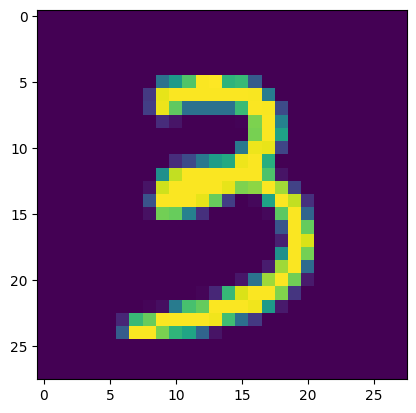

tensor(3)


In [25]:
plt.imshow(x[3].view(28, 28))
plt.show()
print(t.argmax(net(x[3].view(-1, 784))[0]))

In [26]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.FashionMNIST(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

test_dataset = datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

train_loader = t.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = t.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")

Training samples: 60000
Testing samples: 10000


In [27]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 256)
        self.linear2 = nn.Linear(256, 128)
        self.final = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, img):
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.final(x)
        return x
net = Net()

In [28]:
ross_el = nn.CrossEntropyLoss()
optimizer = t.optim.Adam(net.parameters(), lr=0.001)
epochs = 10

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    for x, y in train_loader:
        optimizer.zero_grad()
        output = net(x)
        loss = cross_el(output, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/10], Loss: 0.4942
Epoch [2/10], Loss: 0.3694
Epoch [3/10], Loss: 0.3302
Epoch [4/10], Loss: 0.3051
Epoch [5/10], Loss: 0.2868
Epoch [6/10], Loss: 0.2715
Epoch [7/10], Loss: 0.2538
Epoch [8/10], Loss: 0.2442
Epoch [9/10], Loss: 0.2311
Epoch [10/10], Loss: 0.2185


In [29]:
correct = 0
total = 0

net.eval()
with t.no_grad():
    for x, y in test_loader:
        output = net(x)

        _, predicted = t.max(output, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()

accuracy = round(correct / total, 3)
print(f"Accuracy: {accuracy * 100:.1f}%")

Accuracy: 88.5%
